In [3]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler



In [4]:
data = pd.read_excel('DryBeanDataset/Dry_Bean_Dataset.xlsx')

In [5]:
data.head()

Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272750  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332      0.003147      0.834222      0.998724  SEKER  
1     0.953861      0.006979      0.003564      0.909851      0.998430  SEKER  
2     0.908774      0.007244      0.003048      0.825871      0.999066  SEKER  
3     0.928329      0.007017      0.003215      0.861794      0.994199  SEKER  
4     0.970516      0.006697      0.003665      0.941900      0.999166  SEKER

In [12]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
columns = data.iloc[:, :-1].columns
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [15]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8916636063165626


In [20]:
feature_importance = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'feature': columns,
    'importance': feature_importance
})

In [21]:
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
N = 5 # Number of top features to select
top_features = feature_importance_df.head(N)['feature'].tolist()
print("Top features:", top_features)

Top features: ['ShapeFactor3', 'MajorAxisLength', 'ShapeFactor1', 'Perimeter', 'MinorAxisLength']


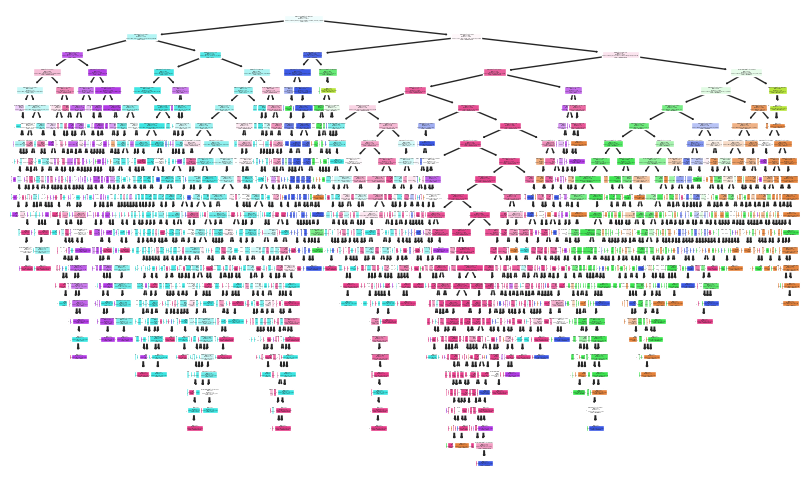

In [22]:
# Reduce the dataset to the top N most important features
X_reduced = pd.DataFrame(X, columns=columns)[top_features].values
# Retrain the decision tree with the reduced dataset
clf_reduced = DecisionTreeClassifier()
clf_reduced.fit(X_reduced, y)
import matplotlib.pyplot as plt
from sklearn import tree

# Create a basic Matplotlib plot
fig, ax = plt.subplots(figsize=(10, 6))
tree.plot_tree(clf_reduced, 
               feature_names=top_features, 
               class_names=data['Class'].unique(), 
               filled=True)

# Save the plot as a PNG file
plt.savefig('reduced_decision_tree.png')

# Display the plot
plt.show()


In [10]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = columns,class_names=data['Class'].unique())
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('decision_tree.png')
Image(graph.create_png())


dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.534352 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.534352 to fit

